In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import sys

Finished simulation. Starting animation...
99%

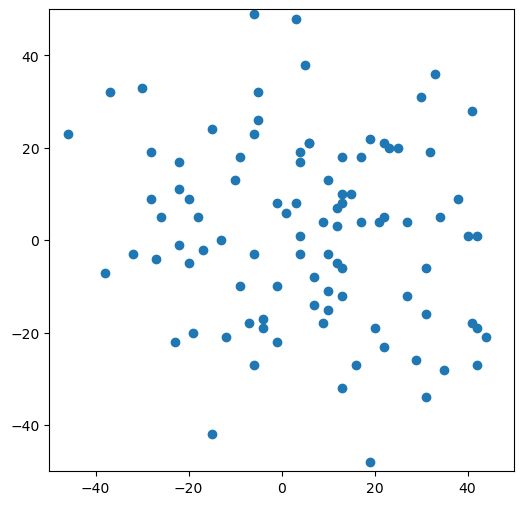

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def get_random_zero_or_one():
    return np.random.randint(0, 2)

def get_random_negative_positive_one():
    # returns either -1 or +1
    return (np.random.randint(0, 2) * -2) + 1

simulations_to_run = 100
steps_to_do = 1000

# correct initialization (no shared inner lists)
positions_x = [[0 for _ in range(simulations_to_run)] for _ in range(steps_to_do)]
positions_y = [[0 for _ in range(simulations_to_run)] for _ in range(steps_to_do)]

# run random walk: each step move either in x or y by ±1
for step in range(steps_to_do - 1):
    for sim in range(simulations_to_run):
        # start from previous position
        x_prev = positions_x[step][sim]
        y_prev = positions_y[step][sim]

        if get_random_zero_or_one() == 0:
            # move in x
            dx = get_random_negative_positive_one()
            dy = 0
        else:
            # move in y
            dx = 0
            dy = get_random_negative_positive_one()

        positions_x[step + 1][sim] = x_prev + dx
        positions_y[step + 1][sim] = y_prev + dy

print("Finished simulation. Starting animation...")

limit = int(steps_to_do / 20)

fig, ax = plt.subplots(figsize=(6, 6))
ax.set_ylim(-limit, limit)
ax.set_xlim(-limit, limit)

# initial scatter; note this returns a PathCollection
campo = ax.scatter([], [])

def init():
    # initialize with empty offsets
    campo.set_offsets(np.empty((0, 2)))
    return (campo,)

def animate(i):
    sys.stdout.write("\r")
    sys.stdout.write(str(int(100*(i/steps_to_do))) + "%")
    sys.stdout.flush()
    xs = positions_x[i]
    ys = positions_y[i]
    # set_offsets expects an (N,2) array
    coords = np.column_stack((xs, ys))
    campo.set_offsets(coords)
    return (campo,)

# create animation
anim = animation.FuncAnimation(
    fig,
    animate,
    init_func=init,
    frames=steps_to_do,
    interval=20,
    blit=True
)

# save to mp4 (requires ffmpeg); fps value can be chosen as desired
anim.save('fluid_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

99%

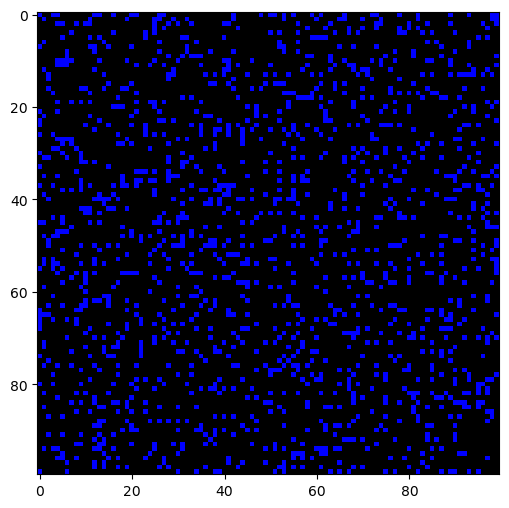

In [75]:
np.random.seed(1000)

State = {
    "S" : 0.9, # infection chance
    "R" : 0.8, # lose recovery chance
    "I" : 0.2, # recovery chance
    "D" : 0.35, # death chance
}

colors = {
    "S" : [0, 0, 255],
    "R" : [0, 255, 0],
    "I" : [255, 0, 0],
    "D" : [0, 0, 0]
}

N = 100

time_limit = 200

fig, ax = plt.subplots(figsize=(6, 6))

people = np.array([["S" for _ in range(N)] for _ in range(N)])

def people_to_colors(people_copy):
    global colors
    out_colors = [[colors[people_copy[i][j]] for j in range(N)] for i in range(N)]
    return out_colors

im = ax.imshow(people_to_colors(people), animated=True)

amount_of_starting_sick = 1

def death_phase(people_copy):
    out_people = np.copy(people_copy)
    for i in range(N):
        for j in range(N):
            if people_copy[i][j] == "I":
                if np.random.rand() < State["D"]:
                    out_people[i][j] = "D"
    return out_people

def infection_phase(people_copy):
    out_people = np.copy(people_copy)
    for i in range(N):
        for j in range(N):
            if people_copy[i][j] == "I":
                for di in range(-1, 2):
                    for dj in range(-1, 2):
                        if (i + di >= 0 and i + di < N) and (j + dj >= 0 and j + dj < N):
                            if people_copy[i+di][j+dj] == "S" and np.random.rand() < State["S"]:
                                out_people[i+di][j+dj] = "I"
    return out_people

def recovery_phase(people_copy):
    out_people = np.copy(people_copy)
    for i in range(N):
        for j in range(N):
            if people_copy[i][j] == "I":
                if np.random.rand() < State["I"]:
                    out_people[i][j] = "R"
    return out_people

def lose_recovery_phase(people_copy):
    out_people = np.copy(people_copy)
    for i in range(N):
        for j in range(N):
            if people_copy[i][j] == "R":
                if np.random.rand() < State["R"]:
                    out_people[i][j] = "S"
    return out_people


def init():
    global people
    people = np.array([["S" for _ in range(N)] for _ in range(N)])

    for _ in range(amount_of_starting_sick):
        starting_sick_i = np.random.randint(0, N)
        starting_sick_j = np.random.randint(0, N)

        while people[starting_sick_i][starting_sick_j] != "S":
            starting_sick_i = np.random.randint(0, N)
            starting_sick_j = np.random.randint(0, N)
    
        people[starting_sick_i][starting_sick_j] = "I"

    im.set_array(people_to_colors(people))
    return (im, )

def animate(frame):
    if frame == 0:
        return (im, )
    sys.stdout.write("\r")
    sys.stdout.write(str(int(100*(frame/time_limit))) + "%")
    sys.stdout.flush()
    global people
    people = infection_phase(people)
    people = lose_recovery_phase(people)
    people = recovery_phase(people)
    people = death_phase(people)

    im.set_array(people_to_colors(people))
    return (im, )

# create animation
anim = animation.FuncAnimation(
    fig,
    animate,
    init_func=init,
    frames=time_limit,
    interval=20,
    blit=True
)

# save to mp4 (requires ffmpeg); fps value can be chosen as desired
anim.save('SIR_animation.mp4', fps=15, extra_args=['-vcodec', 'libx264'])